# Groundwater Data Analysis (2015-2024)

This notebook imports and analyzes the groundwater dataset for performing various data operations.

## 1. Import Required Libraries

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

## 2. Load the Dataset

In [12]:
# Load the groundwater dataset
df = pd.read_csv('output/groundwater_2015_2024.csv')

# Display first few rows
print("First 5 rows of the dataset:")
df.head()

First 5 rows of the dataset:


,station_id,STATE_UT,DISTRICT,BLOCK,LATITUDE,LONGITUDE,DATE,WL_MBGL
0,AndhraPradesh1,Andhra Pradesh,Alluri Sitharama Raju,Addateegala,17.46330,82.0271,01-01-24,9.0
1,AndhraPradesh2,Andhra Pradesh,Alluri Sitharama Raju,Addateegala,17.50320,82.0124,01-01-24,4.0
2,AndhraPradesh3,Andhra Pradesh,Alluri Sitharama Raju,Addateegala,17.57208,82.0085,01-01-24,1.9
3,AndhraPradesh4,Andhra Pradesh,Alluri Sitharama Raju,Addateegala,17.43790,82.0740,01-01-24,1.4
4,AndhraPradesh5,Andhra Pradesh,Alluri Sitharama Raju,Ananthagiri,18.23880,83.0011,01-01-24,5.3


## 3. Display Dataset Information

In [13]:
# Display dataset shape
print(f"Dataset shape: {df.shape}")
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")
print("\n" + "="*50 + "\n")

# Display dataset info
print("Dataset Information:")
df.info()

Dataset shape: (105295, 8)
Number of rows: 105295
Number of columns: 8


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105295 entries, 0 to 105294
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   station_id  105295 non-null  object 
 1   STATE_UT    105295 non-null  object 
 2   DISTRICT    105295 non-null  object 
 3   BLOCK       105295 non-null  object 
 4   LATITUDE    105295 non-null  object 
 5   LONGITUDE   105295 non-null  float64
 6   DATE        105295 non-null  object 
 7   WL_MBGL     105295 non-null  float64
dtypes: float64(2), object(6)
memory usage: 6.4+ MB


In [14]:
# Display statistical summary
print("Statistical Summary:")
df.describe()

Statistical Summary:


,LONGITUDE,WL_MBGL
count,105295.000000,105295.000000
mean,79.107759,7.863536
std,5.042012,9.564594
min,68.686000,0.000000
25%,75.643100,3.100000
50%,77.558330,5.200000
75%,82.242780,8.800000
max,96.177370,146.100000


## 4. Explore Basic Statistics

In [15]:
# Get numerical columns
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()

print("Numerical columns in the dataset:")
print(numerical_cols)
print("\n" + "="*50 + "\n")

# Calculate statistics for numerical columns
for col in numerical_cols:
    print(f"Statistics for {col}:")
    print(f"  Mean: {df[col].mean():.2f}")
    print(f"  Median: {df[col].median():.2f}")
    print(f"  Std Dev: {df[col].std():.2f}")
    print(f"  Min: {df[col].min():.2f}")
    print(f"  Max: {df[col].max():.2f}")
    print()

Numerical columns in the dataset:
['LONGITUDE', 'WL_MBGL']


Statistics for LONGITUDE:
  Mean: 79.11
  Median: 77.56
  Std Dev: 5.04
  Min: 68.69
  Max: 96.18

Statistics for WL_MBGL:
  Mean: 7.86
  Median: 5.20
  Std Dev: 9.56
  Min: 0.00
  Max: 146.10



## 5. Handle Missing Values

In [16]:
# Check for missing values
print("Missing values in each column:")
missing_values = df.isnull().sum()
print(missing_values)
print("\n" + "="*50 + "\n")

# Display percentage of missing values
print("Percentage of missing values:")
missing_percentage = (df.isnull().sum() / len(df)) * 100
print(missing_percentage[missing_percentage > 0])

Missing values in each column:
station_id    0
STATE_UT      0
DISTRICT      0
BLOCK         0
LATITUDE      0
LONGITUDE     0
DATE          0
WL_MBGL       0
dtype: int64


Percentage of missing values:
Series([], dtype: float64)


## 6. Data Filtering and Selection

In [17]:
# Display column names
print("Available columns:")
print(df.columns.tolist())
print("\n" + "="*50 + "\n")

# Example: Select first 10 rows
print("First 10 rows:")
df.head(10)

Available columns:
['station_id', 'STATE_UT', 'DISTRICT', 'BLOCK', 'LATITUDE', 'LONGITUDE', 'DATE', 'WL_MBGL']


First 10 rows:


,station_id,STATE_UT,DISTRICT,BLOCK,LATITUDE,LONGITUDE,DATE,WL_MBGL
0,AndhraPradesh1,Andhra Pradesh,Alluri Sitharama Raju,Addateegala,17.46330,82.02710,01-01-24,9.0
1,AndhraPradesh2,Andhra Pradesh,Alluri Sitharama Raju,Addateegala,17.50320,82.01240,01-01-24,4.0
2,AndhraPradesh3,Andhra Pradesh,Alluri Sitharama Raju,Addateegala,17.57208,82.00850,01-01-24,1.9
3,AndhraPradesh4,Andhra Pradesh,Alluri Sitharama Raju,Addateegala,17.43790,82.07400,01-01-24,1.4
4,AndhraPradesh5,Andhra Pradesh,Alluri Sitharama Raju,Ananthagiri,18.23880,83.00110,01-01-24,5.3
5,AndhraPradesh6,Andhra Pradesh,Alluri Sitharama Raju,Ananthagiri,18.21600,83.10190,01-01-24,5.0
6,AndhraPradesh7,Andhra Pradesh,Alluri Sitharama Raju,Ananthagiri,18.20740,83.07430,01-01-24,5.0
7,AndhraPradesh8,Andhra Pradesh,Alluri Sitharama Raju,Araku Valley,18.32070,82.88140,01-01-24,5.1
8,AndhraPradesh9,Andhra Pradesh,Alluri Sitharama Raju,Araku Valley,18.27850,82.96694,01-01-24,3.3
9,AndhraPradesh10,Andhra Pradesh,Alluri Sitharama Raju,Chintapalle,17.86067,82.33823,01-01-24,7.8


## 7. Data Visualization

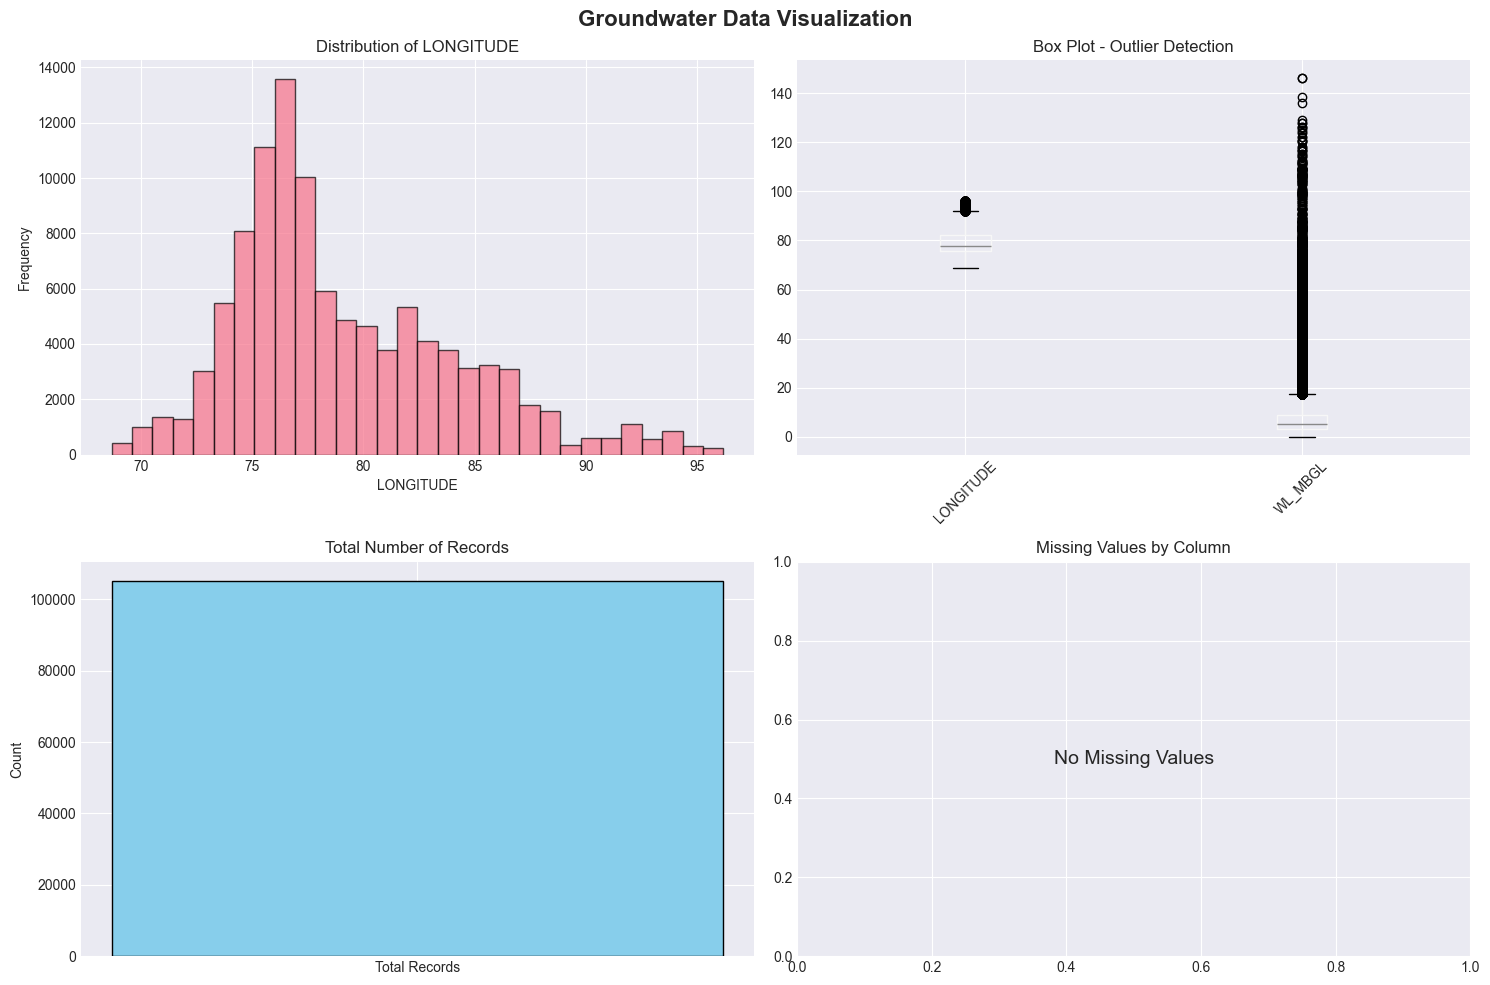

In [18]:
# Set visualization style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Create a figure with subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Groundwater Data Visualization', fontsize=16, fontweight='bold')

# Plot 1: Distribution of numerical columns (if any)
if len(numerical_cols) > 0:
    axes[0, 0].hist(df[numerical_cols[0]].dropna(), bins=30, edgecolor='black', alpha=0.7)
    axes[0, 0].set_title(f'Distribution of {numerical_cols[0]}')
    axes[0, 0].set_xlabel(numerical_cols[0])
    axes[0, 0].set_ylabel('Frequency')

# Plot 2: Box plot for outlier detection
if len(numerical_cols) > 0:
    df.boxplot(column=numerical_cols[:min(3, len(numerical_cols))], ax=axes[0, 1])
    axes[0, 1].set_title('Box Plot - Outlier Detection')
    axes[0, 1].tick_params(axis='x', rotation=45)

# Plot 3: Count of records
axes[1, 0].bar(['Total Records'], [len(df)], color='skyblue', edgecolor='black')
axes[1, 0].set_title('Total Number of Records')
axes[1, 0].set_ylabel('Count')

# Plot 4: Missing values visualization
missing_data = df.isnull().sum()
if missing_data.sum() > 0:
    missing_data[missing_data > 0].plot(kind='bar', ax=axes[1, 1], color='coral', edgecolor='black')
    axes[1, 1].set_title('Missing Values by Column')
    axes[1, 1].set_ylabel('Count')
    axes[1, 1].tick_params(axis='x', rotation=45)
else:
    axes[1, 1].text(0.5, 0.5, 'No Missing Values', ha='center', va='center', fontsize=14)
    axes[1, 1].set_title('Missing Values by Column')

plt.tight_layout()
plt.show()

## 8. Create Unique Station ID

Create a unique station identifier based on STATE, latitude, and longitude (rounded to 4 decimal places).

In [19]:
# Check if required columns exist
print("Columns in dataset:", df.columns.tolist())
print("\n" + "="*50 + "\n")

# Use the actual column names from your dataset
if 'LATITUDE' in df.columns and 'LONGITUDE' in df.columns:
    # Convert LATITUDE and LONGITUDE to numeric (in case they're strings)
    df['LATITUDE'] = pd.to_numeric(df['LATITUDE'], errors='coerce')
    df['LONGITUDE'] = pd.to_numeric(df['LONGITUDE'], errors='coerce')
    
    # Apply the logic row by row to create station_id
    def create_station_id(row):
        lat_round = round(row['LATITUDE'], 4)
        lon_round = round(row['LONGITUDE'], 4)
        STATE = row['STATE_UT'] if 'STATE_UT' in df.columns else 'UNKNOWN'
        station_id = f"{STATE}_{lat_round}_{lon_round}"
        return station_id
    
    df['station_id'] = df.apply(create_station_id, axis=1)
    
    print("Station ID updated successfully!")
    print(f"\nNumber of unique stations: {df['station_id'].nunique()}")
    print("\nSample station IDs:")
    print(df[['station_id', 'LATITUDE', 'LONGITUDE', 'STATE_UT']].head(10))
else:
    print("Error: 'LATITUDE' or 'LONGITUDE' columns not found in dataset")
    print("Please check your column names")

Columns in dataset: ['station_id', 'STATE_UT', 'DISTRICT', 'BLOCK', 'LATITUDE', 'LONGITUDE', 'DATE', 'WL_MBGL']


Station ID updated successfully!

Number of unique stations: 17379

Sample station IDs:
                       station_id  LATITUDE  LONGITUDE        STATE_UT
0  Andhra Pradesh_17.4633_82.0271  17.46330   82.02710  Andhra Pradesh
1  Andhra Pradesh_17.5032_82.0124  17.50320   82.01240  Andhra Pradesh
2  Andhra Pradesh_17.5721_82.0085  17.57208   82.00850  Andhra Pradesh
3   Andhra Pradesh_17.4379_82.074  17.43790   82.07400  Andhra Pradesh
4  Andhra Pradesh_18.2388_83.0011  18.23880   83.00110  Andhra Pradesh
5   Andhra Pradesh_18.216_83.1019  18.21600   83.10190  Andhra Pradesh
6  Andhra Pradesh_18.2074_83.0743  18.20740   83.07430  Andhra Pradesh
7  Andhra Pradesh_18.3207_82.8814  18.32070   82.88140  Andhra Pradesh
8  Andhra Pradesh_18.2785_82.9669  18.27850   82.96694  Andhra Pradesh
9  Andhra Pradesh_17.8607_82.3382  17.86067   82.33823  Andhra Pradesh


In [20]:
df.groupby(["LATITUDE","LONGITUDE"]).size().describe()

count    15373.000000
mean         6.649385
std          3.695439
min          1.000000
25%          3.000000
50%          8.000000
75%         10.000000
max         37.000000
dtype: float64

## 9. Save Updated Dataset

Save the DataFrame with the new station_id column back to the CSV file.

In [21]:
# Save the updated DataFrame back to CSV file
output_file = 'output/groundwater_2015_2024.csv'

try:
    df.to_csv(output_file, index=False)
    print(f"✓ File saved successfully: {output_file}")
except PermissionError:
    # If file is open elsewhere, save to a new file
    backup_file = 'output/groundwater_2015_2024_updated.csv'
    df.to_csv(backup_file, index=False)
    print(f"⚠ Original file is open elsewhere!")
    print(f"✓ Data saved to new file: {backup_file}")
    print(f"\nClose the original file and rename this file, or run this cell again.")
    output_file = backup_file

print(f"\nTotal rows: {len(df)}")
print(f"Total columns: {len(df.columns)}")
print(f"\nColumns in saved file:")
print(df.columns.tolist())

✓ File saved successfully: output/groundwater_2015_2024.csv

Total rows: 105295
Total columns: 8

Columns in saved file:
['station_id', 'STATE_UT', 'DISTRICT', 'BLOCK', 'LATITUDE', 'LONGITUDE', 'DATE', 'WL_MBGL']


## 10. Resort and Check Temporal Continuity

Convert DATE to datetime format, sort by station and date, and analyze temporal patterns.

In [22]:
# Convert DATE column to datetime format (day first format)
df['DATE'] = pd.to_datetime(df['DATE'], dayfirst=True)
print("✓ DATE column converted to datetime format")
print(f"Date range: {df['DATE'].min()} to {df['DATE'].max()}")
print("\n" + "="*50 + "\n")

# Sort dataframe by station_id and DATE
df = df.sort_values(['station_id', 'DATE'])
print("✓ DataFrame sorted by station_id and DATE")
print("\n" + "="*50 + "\n")

# Check temporal continuity - count unique dates per station
temporal_stats = df.groupby('station_id')['DATE'].nunique().describe()
print("Temporal Continuity Statistics (Unique dates per station):")
print(temporal_stats)
print("\n" + "="*50 + "\n")

# Additional temporal analysis
print("Additional Temporal Information:")
print(f"Total unique stations: {df['station_id'].nunique()}")
print(f"Total unique dates across all stations: {df['DATE'].nunique()}")
print(f"Total records: {len(df)}")
print(f"Average records per station: {len(df) / df['station_id'].nunique():.2f}")

# Show first few rows after sorting
print("\n" + "="*50 + "\n")
print("First 10 rows after sorting:")
df.head(10)

✓ DATE column converted to datetime format
Date range: 2015-01-01 00:00:00 to 2024-01-31 00:00:00


✓ DataFrame sorted by station_id and DATE


Temporal Continuity Statistics (Unique dates per station):
count    17379.000000
mean         5.969216
std          3.577662
min          1.000000
25%          2.000000
50%          7.000000
75%         10.000000
max         17.000000
Name: DATE, dtype: float64


Additional Temporal Information:
Total unique stations: 17379
Total unique dates across all stations: 273
Total records: 105295
Average records per station: 6.06


First 10 rows after sorting:


C:\Users\lsing\AppData\Local\Temp\ipykernel_27056\3758697533.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['DATE'] = pd.to_datetime(df['DATE'], dayfirst=True)


,station_id,STATE_UT,DISTRICT,BLOCK,LATITUDE,LONGITUDE,DATE,WL_MBGL
72867,Adilabad_19.3441_78.3579,Adilabad,Boath,Boath,19.34406,78.35794,2018-01-01,3.9
62050,Adilabad_19.3441_78.3579,Adilabad,Boath,Boath,19.34406,78.35794,2019-01-01,3.7
41290,Adilabad_19.3441_78.3579,Adilabad,Boath,Boath,19.34406,78.35794,2021-01-01,3.7
72871,Adilabad_19.5004_78.6622,Adilabad,Indervelly,Indravalli,19.50043,78.66224,2018-01-01,4.1
72870,Adilabad_19.5124_78.5853,Adilabad,Indervelly,Danora,19.51242,78.58533,2018-01-01,4.5
72868,Adilabad_19.5304_78.5135,Adilabad,Gudihatnur,Gudihathur,19.53039,78.51345,2018-01-01,4.3
62051,Adilabad_19.5304_78.5135,Adilabad,Gudihatnur,Gudihathur,19.53039,78.51345,2019-01-01,4.5
72869,Adilabad_19.581_78.4937,Adilabad,Gudihatnur,Sitagondi,19.58098,78.49373,2018-01-01,4.3
72873,Adilabad_19.6377_78.5083,Adilabad,Mavala,Mavala (Adilabad),19.63772,78.50835,2018-01-01,7.2
62049,Adilabad_19.7186_78.7609,Adilabad,Bela,Bela,19.71864,78.76094,2019-01-01,4.8


In [23]:
df['DATE'] = pd.to_datetime(
    df['DATE'],
    format='%d-%m-%Y',
    errors='coerce'
)


In [24]:
df['DATE'].isna().sum()


np.int64(0)

In [25]:
df_filtered = df.groupby('station_id').filter(
    lambda x: x['DATE'].nunique() >= 6
)


In [26]:
df_filtered['station_id'].nunique()


9695

In [27]:
df_filtered = df_filtered[df_filtered['DATE'].dt.month == 1]


## 11. Compute Station Baselines

Calculate baseline statistics (mean, min, max, std) for water level at each station.

In [28]:
# Compute station baselines - aggregate statistics by station
baseline = df_filtered.groupby('station_id').agg(
    mean_wl=('WL_MBGL', 'mean'),
    min_wl=('WL_MBGL', 'min'),
    max_wl=('WL_MBGL', 'max'),
    std_wl=('WL_MBGL', 'std')
).reset_index()

print("✓ Station baselines computed successfully!")
print(f"\nTotal stations with baselines: {len(baseline)}")
print("\n" + "="*50 + "\n")
print("Baseline Statistics Summary:")
print(baseline.describe())
print("\n" + "="*50 + "\n")
print("First 10 stations with baseline data:")
baseline.head(10)

✓ Station baselines computed successfully!

Total stations with baselines: 9695


Baseline Statistics Summary:
           mean_wl       min_wl       max_wl       std_wl
count  9695.000000  9695.000000  9695.000000  9695.000000
mean      7.534218     5.103950    10.367282     1.768681
std       8.724939     7.830345    10.174551     1.751209
min       0.120000     0.000000     0.300000     0.057735
25%       3.388889     1.800000     5.000000     0.743263
50%       5.270000     3.100000     7.800000     1.282532
75%       8.204167     5.200000    11.800000     2.205549
max     117.488889   112.500000   136.000000    32.777729


First 10 stations with baseline data:


,station_id,mean_wl,min_wl,max_wl,std_wl
0,Andhra Pradesh_13.1956_79.004,5.485714,2.8,8.1,2.268941
1,Andhra Pradesh_13.2075_79.0981,3.771429,1.7,7.8,2.062938
2,Andhra Pradesh_13.4262_79.4531,5.085714,2.2,10.7,2.729120
3,Andhra Pradesh_13.5609_79.2493,4.633333,1.3,11.4,2.877933
4,Andhra Pradesh_13.6371_79.9008,1.820000,1.4,2.5,0.399444
5,Andhra Pradesh_13.6663_78.4184,8.360000,0.9,12.6,4.051118
6,Andhra Pradesh_13.8275_78.7878,5.670000,2.9,11.0,2.337164
7,Andhra Pradesh_13.908_79.7315,1.260000,0.1,3.2,1.001332
8,Andhra Pradesh_13.9305_80.0384,2.700000,0.8,7.2,1.935846
9,Andhra Pradesh_13.9495_78.6885,6.180000,2.2,11.6,3.551463


In [29]:
# Save station baseline to CSV file
baseline_file = 'output/station_baseline.csv'

try:
    baseline.to_csv(baseline_file, index=False)
    print(f"✓ Station baseline saved successfully: {baseline_file}")
except PermissionError:
    # If file is open elsewhere, save to a new file
    backup_file = 'output/station_baseline_new.csv'
    baseline.to_csv(backup_file, index=False)
    print(f"⚠ Original file is open elsewhere!")
    print(f"✓ Data saved to new file: {backup_file}")
    baseline_file = backup_file

print(f"\nTotal stations: {len(baseline)}")
print(f"Columns: {baseline.columns.tolist()}")

✓ Station baseline saved successfully: output/station_baseline.csv

Total stations: 9695
Columns: ['station_id', 'mean_wl', 'min_wl', 'max_wl', 'std_wl']


## 12. Add Trend Features

Extract year and calculate year-on-year water level changes to identify early stress signals.

In [30]:
# Extract year from DATE column
df_filtered['year'] = df_filtered['DATE'].dt.year
print("✓ Year extracted from DATE column")
print(f"Year range: {df_filtered['year'].min()} to {df_filtered['year'].max()}")
print("\n" + "="*50 + "\n")

# Sort by station_id and year
df_filtered = df_filtered.sort_values(['station_id', 'year'])
print("✓ DataFrame sorted by station_id and year")
print("\n" + "="*50 + "\n")

# Calculate year-on-year water level change (delta_wl)
df_filtered['delta_wl'] = (
    df_filtered.groupby('station_id')['WL_MBGL'].diff()
)

print("✓ Year-on-year water level change (delta_wl) calculated")
print(f"\nTotal records with delta_wl: {df_filtered['delta_wl'].notna().sum()}")
print(f"Records with missing delta_wl (first year per station): {df_filtered['delta_wl'].isna().sum()}")
print("\n" + "="*50 + "\n")

# Analyze delta_wl statistics
print("Delta WL Statistics (Early Stress Signal):")
print(df_filtered['delta_wl'].describe())
print("\n" + "="*50 + "\n")

# Show sample data with trend features
print("Sample data with trend features:")
print(df_filtered[['station_id', 'DATE', 'year', 'WL_MBGL', 'delta_wl']].head(15))

✓ Year extracted from DATE column
Year range: 2015 to 2024


✓ DataFrame sorted by station_id and year


✓ Year-on-year water level change (delta_wl) calculated

Total records with delta_wl: 78099
Records with missing delta_wl (first year per station): 9695


Delta WL Statistics (Early Stress Signal):
count    78099.000000
mean        -0.023219
std          2.967582
min        -57.000000
25%         -0.800000
50%          0.000000
75%          0.900000
max         84.400000
Name: delta_wl, dtype: float64


Sample data with trend features:
                           station_id       DATE  year  WL_MBGL  delta_wl
95538   Andhra Pradesh_13.1956_79.004 2015-01-01  2015      8.1       NaN
84953   Andhra Pradesh_13.1956_79.004 2016-01-01  2016      3.2      -4.9
74144   Andhra Pradesh_13.1956_79.004 2017-01-01  2017      8.0       4.8
63331   Andhra Pradesh_13.1956_79.004 2018-01-01  2018      4.0      -4.0
22350   Andhra Pradesh_13.1956_79.004 2022-01-01  2022      2.8      -1.2
11374   And

## 13. Handle Data Quality Issues

Filter extreme depth outliers and handle edge cases to ensure data quality for analysis.

In [31]:
# ISSUE 1: Filter extreme depth outliers (focus on unconfined aquifers)
# Cap water levels at 50 mbgl - CGWB standard for unconfined aquifer monitoring
print("Before filtering extreme depths:")
print(f"Total records: {len(df_filtered)}")
print(f"Max WL_MBGL: {df_filtered['WL_MBGL'].max():.2f}")
print(f"Records > 50 mbgl: {(df_filtered['WL_MBGL'] > 50).sum()}")
print("\n" + "="*50 + "\n")

# Filter df_filtered: Keep only unconfined aquifer data (WL_MBGL <= 50)
df_filtered = df_filtered[df_filtered['WL_MBGL'] <= 50]

print("✓ Extreme depth outliers filtered (WL_MBGL <= 50 mbgl)")
print(f"Total records after filtering: {len(df_filtered)}")
print(f"Max WL_MBGL after filtering: {df_filtered['WL_MBGL'].max():.2f}")
print(f"Unique stations remaining: {df_filtered['station_id'].nunique()}")
print("\n" + "="*50 + "\n")

# Filter baseline: Keep only stations with max_wl <= 50
print("Before filtering baseline:")
print(f"Total stations in baseline: {len(baseline)}")
print(f"Max max_wl: {baseline['max_wl'].max():.2f}")
print(f"Stations with max_wl > 50: {(baseline['max_wl'] > 50).sum()}")
print("\n" + "="*50 + "\n")

baseline = baseline[baseline['max_wl'] <= 50]

print("✓ Baseline filtered (max_wl <= 50 mbgl)")
print(f"Total stations in baseline after filtering: {len(baseline)}")
print(f"Max max_wl after filtering: {baseline['max_wl'].max():.2f}")
print("\n" + "="*50 + "\n")

# ISSUE 2: Handle GAVI division edge cases
# Remove stations where max_wl == min_wl (would cause division by zero)
print("Checking for GAVI division edge cases:")
edge_cases = baseline[baseline['max_wl'] == baseline['min_wl']]
print(f"Stations with max_wl == min_wl: {len(edge_cases)}")

if len(edge_cases) > 0:
    print("Sample edge cases:")
    print(edge_cases.head())
    print("\n" + "="*50 + "\n")

baseline = baseline[baseline['max_wl'] > baseline['min_wl']]

print("✓ GAVI division edge cases handled")
print(f"Final stations in baseline: {len(baseline)}")
print("\n" + "="*50 + "\n")

# Summary statistics after cleaning
print("Final Baseline Statistics (Clean Data):")
print(baseline.describe())
print("\n" + "="*50 + "\n")
print("First 10 stations in clean baseline:")
baseline.head(10)

Before filtering extreme depths:
Total records: 87794
Max WL_MBGL: 136.00
Records > 50 mbgl: 882


✓ Extreme depth outliers filtered (WL_MBGL <= 50 mbgl)
Total records after filtering: 86912
Max WL_MBGL after filtering: 50.00
Unique stations remaining: 9632


Before filtering baseline:
Total stations in baseline: 9695
Max max_wl: 136.00
Stations with max_wl > 50: 150


✓ Baseline filtered (max_wl <= 50 mbgl)
Total stations in baseline after filtering: 9545
Max max_wl after filtering: 50.00


Checking for GAVI division edge cases:
Stations with max_wl == min_wl: 0
✓ GAVI division edge cases handled
Final stations in baseline: 9545


Final Baseline Statistics (Clean Data):
           mean_wl       min_wl       max_wl       std_wl
count  9545.000000  9545.000000  9545.000000  9545.000000
mean      6.751708     4.422693     9.467480     1.691240
std       5.737750     5.041781     6.976454     1.463318
min       0.120000     0.000000     0.300000     0.057735
25%       3.363636     1.80000

,station_id,mean_wl,min_wl,max_wl,std_wl
0,Andhra Pradesh_13.1956_79.004,5.485714,2.8,8.1,2.268941
1,Andhra Pradesh_13.2075_79.0981,3.771429,1.7,7.8,2.062938
2,Andhra Pradesh_13.4262_79.4531,5.085714,2.2,10.7,2.729120
3,Andhra Pradesh_13.5609_79.2493,4.633333,1.3,11.4,2.877933
4,Andhra Pradesh_13.6371_79.9008,1.820000,1.4,2.5,0.399444
5,Andhra Pradesh_13.6663_78.4184,8.360000,0.9,12.6,4.051118
6,Andhra Pradesh_13.8275_78.7878,5.670000,2.9,11.0,2.337164
7,Andhra Pradesh_13.908_79.7315,1.260000,0.1,3.2,1.001332
8,Andhra Pradesh_13.9305_80.0384,2.700000,0.8,7.2,1.935846
9,Andhra Pradesh_13.9495_78.6885,6.180000,2.2,11.6,3.551463


In [32]:
df_raw = df.copy()


## 14. Analyze and Save All Modified Datasets

Comprehensive analysis of all dataframes and save all modified datasets.

In [33]:
# Comprehensive analysis of all dataframes
print("="*70)
print("COMPREHENSIVE DATAFRAME ANALYSIS")
print("="*70)

# 1. Original DataFrame (df)
print("\n1. ORIGINAL DATAFRAME (df)")
print("-" * 70)
print(f"Shape: {df.shape}")
print(f"Columns: {df.columns.tolist()}")
print(f"Unique stations: {df['station_id'].nunique()}")
print(f"Date range: {df['DATE'].min()} to {df['DATE'].max()}")
print(f"Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
print("\nFirst 5 rows:")
print(df.head())

print("\n" + "="*70)

# 2. Filtered DataFrame (df_filtered)
print("\n2. FILTERED DATAFRAME (df_filtered)")
print("-" * 70)
print(f"Shape: {df_filtered.shape}")
print(f"Columns: {df_filtered.columns.tolist()}")
print(f"Unique stations: {df_filtered['station_id'].nunique()}")
print(f"Date range: {df_filtered['DATE'].min()} to {df_filtered['DATE'].max()}")
print(f"Year range: {df_filtered['year'].min()} to {df_filtered['year'].max()}")
print(f"WL_MBGL range: {df_filtered['WL_MBGL'].min():.2f} to {df_filtered['WL_MBGL'].max():.2f}")
print(f"Memory usage: {df_filtered.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
print("\nFirst 5 rows:")
print(df_filtered.head())

print("\n" + "="*70)

# 3. Baseline DataFrame
print("\n3. BASELINE DATAFRAME")
print("-" * 70)
print(f"Shape: {baseline.shape}")
print(f"Columns: {baseline.columns.tolist()}")
print(f"Total stations: {len(baseline)}")
print(f"Memory usage: {baseline.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
print("\nStatistics:")
print(baseline.describe())
print("\nFirst 5 rows:")
print(baseline.head())

print("\n" + "="*70)
print("ANALYSIS COMPLETE")
print("="*70)

COMPREHENSIVE DATAFRAME ANALYSIS

1. ORIGINAL DATAFRAME (df)
----------------------------------------------------------------------
Shape: (105295, 8)
Columns: ['station_id', 'STATE_UT', 'DISTRICT', 'BLOCK', 'LATITUDE', 'LONGITUDE', 'DATE', 'WL_MBGL']
Unique stations: 17379
Date range: 2015-01-01 00:00:00 to 2024-01-31 00:00:00
Memory usage: 28.85 MB

First 5 rows:
                     station_id  STATE_UT    DISTRICT       BLOCK  LATITUDE  \
72867  Adilabad_19.3441_78.3579  Adilabad       Boath       Boath  19.34406   
62050  Adilabad_19.3441_78.3579  Adilabad       Boath       Boath  19.34406   
41290  Adilabad_19.3441_78.3579  Adilabad       Boath       Boath  19.34406   
72871  Adilabad_19.5004_78.6622  Adilabad  Indervelly  Indravalli  19.50043   
72870  Adilabad_19.5124_78.5853  Adilabad  Indervelly      Danora  19.51242   

       LONGITUDE       DATE  WL_MBGL  
72867   78.35794 2018-01-01      3.9  
62050   78.35794 2019-01-01      3.7  
41290   78.35794 2021-01-01      3.7  
7

In [34]:
# Save all modified datasets
print("="*70)
print("SAVING ALL MODIFIED DATASETS")
print("="*70)

saved_files = []

# 1. Save filtered dataset
print("\n1. Saving filtered dataset...")
filtered_file = 'output/groundwater_filtered_clean.csv'
try:
    df_filtered.to_csv(filtered_file, index=False)
    print(f"✓ Saved: {filtered_file}")
    saved_files.append(filtered_file)
except PermissionError:
    backup_file = 'output/groundwater_filtered_clean_new.csv'
    df_filtered.to_csv(backup_file, index=False)
    print(f"✓ Saved (backup): {backup_file}")
    saved_files.append(backup_file)

# 2. Save baseline
print("\n2. Saving station baseline...")
baseline_file = 'output/station_baseline.csv'
try:
    baseline.to_csv(baseline_file, index=False)
    print(f"✓ Saved: {baseline_file}")
    saved_files.append(baseline_file)
except PermissionError:
    backup_file = 'output/station_baseline_clean.csv'
    baseline.to_csv(backup_file, index=False)
    print(f"✓ Saved (backup): {backup_file}")
    saved_files.append(backup_file)

# 3. Save complete dataset with station_id
print("\n3. Saving complete dataset with station_id...")
complete_file = 'output/groundwater_2015_2024_complete.csv'
try:
    df.to_csv(complete_file, index=False)
    print(f"✓ Saved: {complete_file}")
    saved_files.append(complete_file)
except PermissionError:
    backup_file = 'output/groundwater_2015_2024_complete_new.csv'
    df.to_csv(backup_file, index=False)
    print(f"✓ Saved (backup): {backup_file}")
    saved_files.append(backup_file)

print("\n" + "="*70)
print("SAVE SUMMARY")
print("="*70)
print(f"\nTotal files saved: {len(saved_files)}")
print("\nFiles:")
for i, file in enumerate(saved_files, 1):
    print(f"  {i}. {file}")

print("\n" + "="*70)
print("✓ ALL DATASETS SAVED SUCCESSFULLY!")
print("="*70)

SAVING ALL MODIFIED DATASETS

1. Saving filtered dataset...
✓ Saved: output/groundwater_filtered_clean.csv

2. Saving station baseline...
✓ Saved: output/station_baseline.csv

3. Saving complete dataset with station_id...
✓ Saved: output/groundwater_2015_2024_complete.csv

SAVE SUMMARY

Total files saved: 3

Files:
  1. output/groundwater_filtered_clean.csv
  2. output/station_baseline.csv
  3. output/groundwater_2015_2024_complete.csv

✓ ALL DATASETS SAVED SUCCESSFULLY!
